# MTpy Example 05

## Depth of Investigation

To get a better idea of depth of investigation we can use the Niblett-Bostick tranformation.  This is a 1D transformation of apparent resistivity to depth.

depth $= \sqrt(\dfrac{\rho_a \cdot T}{2 \cdot \pi \cdot \mu_0})$ in meters.  

Where:

  - $\rho_a$ is the apparent resistivity in $\Omega \cdot m$
  - $T$ is period in seconds
  - $\mu_0$ is the permitivity of free space

In [1]:
from pathlib import Path
from mtpy import MTCollection
#%matplotlib widget

### Open MTCollection

In the previous example we created a MTH5 file from existing Yellowstone data.  Let's open that file here for plotting.

In [2]:
%%time
with MTCollection() as mc:
    mc.open_collection(Path(r"c:\Users\jpeacock\OneDrive - DOI\SAGE\2024\EDI_Files\SAGE_tf_all.h5"))
    mt_data = mc.to_mt_data()

24:06:28T09:37:29 | INFO | line:759 |mth5.mth5 | close_mth5 | Flushing and closing c:\Users\jpeacock\OneDrive - DOI\SAGE\2024\EDI_Files\SAGE_tf_all.h5
CPU times: total: 12.6 s
Wall time: 12.7 s


## Plot Depth of Investigation Maps

We can plot the depth of investigation for a single station, which provides the depth estimates for the TE, TM, and Determinant of the impedance tensor.  The Niblett-Bostick method in `mtpy.analysis.niblettbostick.calculate_depth_of_investigation` rotates the data according to 2D strike estimation to get the data into a geoelectric coordinate system so that TE and TM modes are properly represented.  The determinant provides a general guideline to the depth of investigation.  

The plot is on a log-log scale with the y-axis being period from short periods at the top (shallow) and long periods at the bottom (deep).  The x-axis represents the depth of investigation for the given mode.

Plotting a single station is nice, but sometimes a map view provides a better spatial representation.  Here lets plot all the stations. Its quicker in the notebooks if we create a `mt_data` (dictionary of transfer function objects `mtpy.core.MT`) and then use that as input for plotting.  Otherwise if you rerun the plotting code without the input it will pull the `mt_data` each time and that is slow. 

  - **TE Mode**: is parallel to geoelectric strike (the more conductive mode) which allows electrical currents to flow well, but also causes them to decay more quickly.  Thus the penetration depth is often shallower than the TM mode.  In this case almost by an order of magnitude.  
  - **TM Mode**: perpendicular to geoelectric strike and thus more resistive.  This allows impinging magnetic fields to penetrate deeper, as seen here
  - **Determinant**: provides a good 1D approximation for the depth of penetration that incorporates all modes. 

In [4]:
plot_doi_map = mt_data.plot_penetration_depth_map(plot_period = 100, interpolation_method="cubic", fig_num=1, plot_te=False, plot_tm=False)

ValueError: Index 'period' must be monotonically increasing

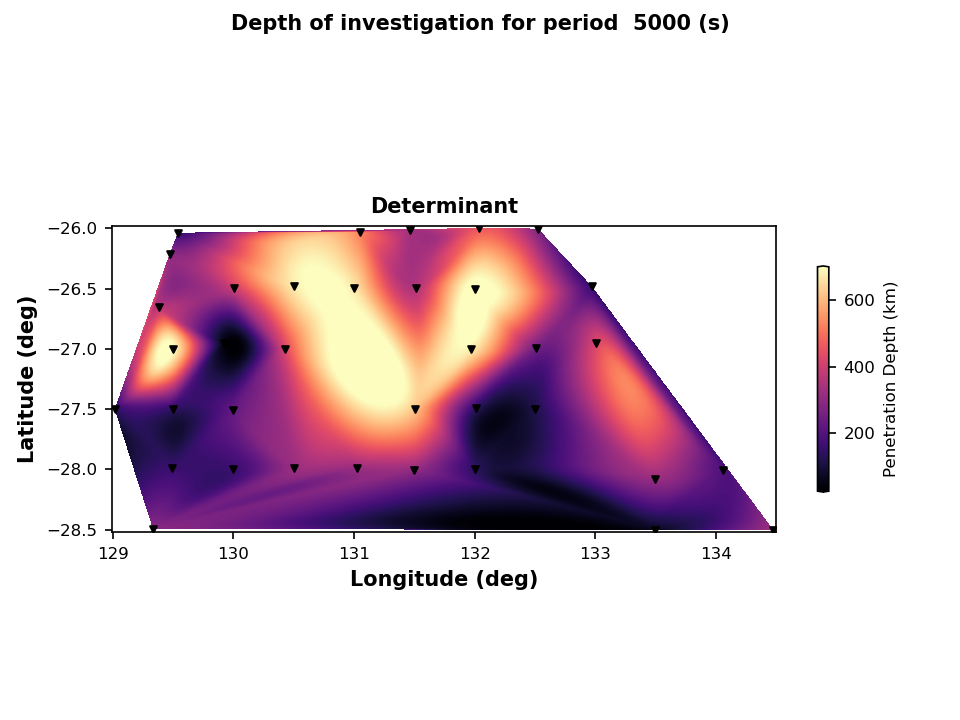

In [5]:
plot_doi_map.plot_period = 5000
plot_doi_map.fig_num = 4
plot_doi_map.depth_range = (25,700)
plot_doi_map.redraw_plot()

CPU times: user 1.24 s, sys: 16.7 ms, total: 1.26 s
Wall time: 1.26 s


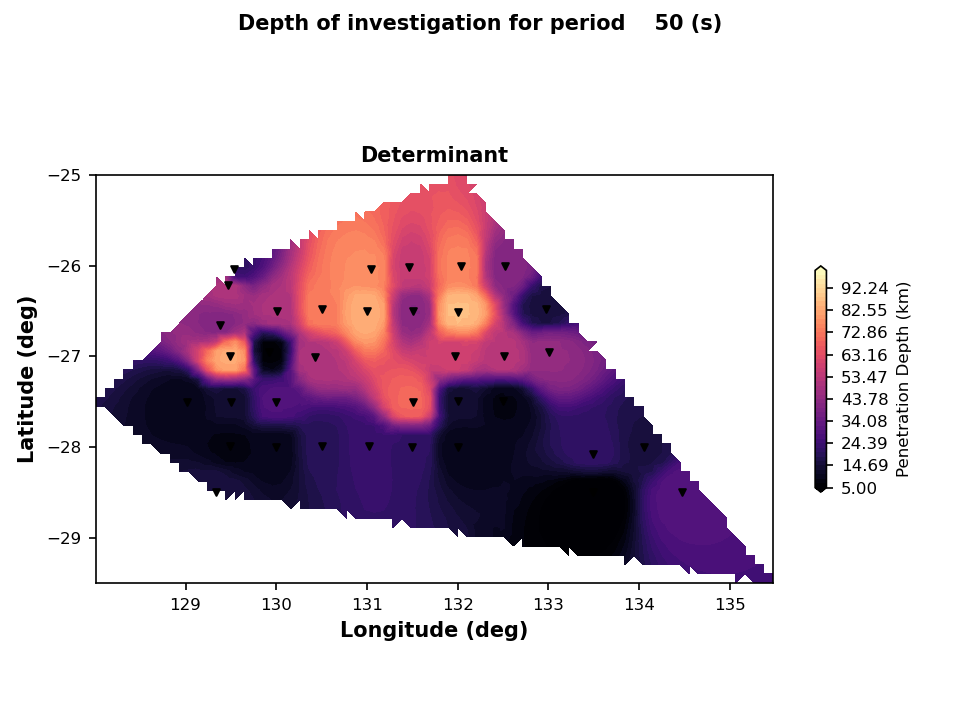

In [6]:
%%time
plot_doi_map.plot_period = 50
plot_doi_map.fig_num = 5
plot_doi_map.cell_size = .1
plot_doi_map.interpolation_method = "delaunay"
plot_doi_map.depth_range = (5,100)
plot_doi_map.redraw_plot()